# EDA for Bank term deposit data

### Considering the hypothesis that the term deposit plans are taken mostly by middle age people. 

In [1]:
import pandas as pd
import altair as alt


In [2]:
df=pd.read_csv("bank-full1.csv",sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [4]:
df.shape


(45211, 17)

In [5]:
filteryes=df['y']=='yes'
dffilter=df[filteryes].groupby('age')['y'].agg(agegroup='count').reset_index()
dffilter

,age,agegroup
0,18,7
1,19,11
2,20,15
3,21,22
4,22,40
...,...,...
69,87,3
70,90,2
71,92,2
72,93,2


In [6]:
alt.Chart(dffilter).mark_line().encode(x='age',y='agegroup')

alt.Chart(...)

We are taking the data based on the absolute count of customers in each age range. If the proportion of banking customers is higher within the age range of 25 to 40, then we are very likely to get a plot like the one that we have got. What we really should plot is the proportion of customers, within each age group, who buy a term deposit.

In [7]:
dff1= df.groupby(['age'])['y'].agg(agetot='count').reset_index()
dff1.head()

,age,agetot
0,18,12
1,19,35
2,20,50
3,21,79
4,22,129


In [8]:
dff2= df.groupby(['age','y'])['y'].agg(agetot='count').reset_index()
dff2.head()

,age,y,agetot
0,18,no,5
1,18,yes,7
2,19,no,24
3,19,yes,11
4,20,no,35


In [9]:
alt.Chart(dff2).mark_line().encode(x="age",y="agetot")

alt.Chart(...)

In [10]:
dfcomb=pd.merge(dff1,dff2, on="age")
dfcomb['prop']= (dfcomb.agetot_y/dfcomb.agetot_x)*100
dfcomb.head()

,age,agetot_x,y,agetot_y,prop
0,18,12,no,5,41.666667
1,18,12,yes,7,58.333333
2,19,35,no,24,68.571429
3,19,35,yes,11,31.428571
4,20,50,no,35,70.000000


In [11]:
alt.Chart(dfcomb).mark_line().encode(x="age",y="prop").facet(column='y')

alt.FacetChart(...)

We can see, in the first graph, with the age group beginning from 22 to 60, individuals would not be inclined to purchase the term deposit. However, in the second graph, we see the opposite, where the age group of 60 and over are much more inclined to purchase the term deposit plan.

In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [13]:
d2f= df.groupby(["housing","y"])["y"].agg(cat="count").reset_index()
d2f.head()

,housing,y,cat
0,no,no,16727
1,no,yes,3354
2,yes,no,23195
3,yes,yes,1935


## Correlation plot on the numeric data

In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [16]:
#numeric variables
dfnum= df[['age','balance','day','duration','campaign','pdays','previous']]

In [17]:
dfnum.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [18]:
dfcorr=dfnum.corr(method='pearson')
dfcorr

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [19]:
from matplotlib import pyplot
corfig=pyplot.figure()
figaxis=corfig.add_subplot(111)
corAx = figaxis.matshow(dfcorr,vmin=-1,vmax=1)
corfig.colorbar(corAx)
pyplot.show()



<Figure size 640x480 with 2 Axes>

## Checking the skewness and correcting it

In [20]:
dfnum.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

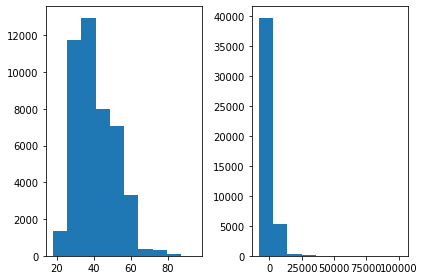

In [21]:
#Visualization
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,2)
ax[0].hist(dfnum.age)
ax[1].hist(dfnum.balance)
plt.tight_layout()

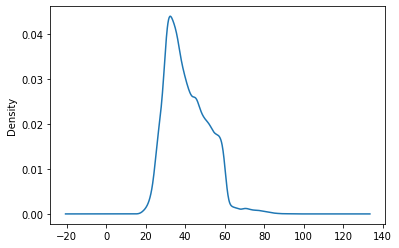

In [22]:
#Quick method to get histogram of any numeric column in a dataset
#dfnum['age'].plot(kind="hist")
dfnum['age'].plot(kind="density")

In [23]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scale=StandardScaler().fit(dfnum)
norm=scale.transform(dfnum)


In [24]:
#normalizing
from sklearn.preprocessing import Normalizer
norm1=Normalizer().fit(dfnum)
normt=norm1.transform(dfnum)
normt

array([[ 2.68565695e-02,  9.92303940e-01,  2.31522151e-03, ...,
         4.63044303e-04, -4.63044303e-04,  0.00000000e+00],
       [ 2.74973148e-01,  1.81232302e-01,  3.12469487e-02, ...,
         6.24938974e-03, -6.24938974e-03,  0.00000000e+00],
       [ 3.97388517e-01,  2.40841525e-02,  6.02103814e-02, ...,
         1.20420763e-02, -1.20420763e-02,  0.00000000e+00],
       ...,
       [ 1.23532190e-02,  9.80536756e-01,  2.91673226e-03, ...,
         8.57862429e-04,  3.15693374e-02,  5.14717457e-04],
       [ 6.77495453e-02,  7.93977128e-01,  2.02060047e-02, ...,
         4.75435406e-03, -1.18858851e-03,  0.00000000e+00],
       [ 1.23372483e-02,  9.90647694e-01,  5.66846543e-03, ...,
         6.66878286e-04,  6.26865589e-02,  3.66783057e-03]])

## Using Logistic Regression for classification

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [26]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [48]:
dfcat=pd.get_dummies(df[['job','marital','education','default','housing','loan','contact','month','poutcome']])


In [56]:
X=pd.concat([dfcat,dfnum],axis=1)

Y=df['y']

In [59]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.3, random_state=123)

In [64]:
bankm=LogisticRegression()
bankm.fit(X_train,y_train)
pred=bankm.predict(X_test)

bankm.score(X_test,y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9002506635210852

In [66]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred)
cm

array([[11708,   290],
       [ 1063,   503]], dtype=int64)

In [69]:
from sklearn.metrics import classification_report
cr= classification_report(y_test,pred)
print(cr)

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     11998
         yes       0.63      0.32      0.43      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564

